### Cab-Driver Agent

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp '/content/gdrive/MyDrive/Colab Notebooks/Deep RL Assignment/Env.py' .
!cp '/content/gdrive/MyDrive/Colab Notebooks/Deep RL Assignment/TM.npy' .

In [4]:
# Importing libraries
import numpy as np
import random
import math
from collections import deque
import collections
import pickle

# for building DQN model
from keras import layers
from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

# for plotting graphs
import matplotlib.pyplot as plt

# Import the environment
from Env import CabDriver

#### Defining Time Matrix

In [5]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")

In [8]:
c = CabDriver()
c.init_action_space()
c.init_state_space()

[(1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 4, 6),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (1, 5, 6),
 (1, 6, 0),
 (1, 6, 1),
 (1, 6, 2),
 (1, 6, 3),
 (1, 6, 4),
 (1, 6, 5),
 (1, 6, 6),
 (1, 7, 0),
 (1, 7, 1),
 (1, 7, 2),
 (1, 7, 3),
 (1, 7, 4),
 (1, 7, 5),
 (1, 7, 6),
 (1, 8, 0),
 (1, 8, 1),
 (1, 8, 2),
 (1, 8, 3),
 (1, 8, 4),
 (1, 8, 5),
 (1, 8, 6),
 (1, 9, 0),
 (1, 9, 1),
 (1, 9, 2),
 (1, 9, 3),
 (1, 9, 4),
 (1, 9, 5),
 (1, 9, 6),
 (1, 10, 0),
 (1, 10, 1),
 (1, 10, 2),
 (1, 10, 3),
 (1, 10, 4),
 (1, 10, 5),
 (1, 10, 6),
 (1, 11, 0),
 (1, 11, 1),
 (1, 11, 2),
 (1, 11, 3),
 (1, 11, 4),
 (1,

In [22]:
for i in range(10):
  print(np.random.poisson(10))

13
7
5
9
10
10
7
6
9
7


In [9]:
np.zeros(3)

array([0., 0., 0.])

In [25]:
from itertools import product
A= [1,3]
B= [3,5]
list(product(A,B))

[(1, 3), (1, 5), (3, 3), (3, 5)]

In [18]:
Time_matrix.shape
Time_matrix[0,0,23,6]

0.0

#### Tracking the state-action pairs for checking convergence


In [ ]:
#Defining a function to save the Q-dictionary as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor =
        self.learning_rate =        
        self.epsilon_max = 
        self.epsilon_decay = 
        self.epsilon_min = 
        
        self.batch_size = 32        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()

    # approximate Q function using Neural Network
    def build_model(self):
        model = Sequential()
        # Write your code here: Add layers to your neural nets       
        
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        model.summary
        return model



    def get_action(self, state):
    # Write your code here:
    # get action from model using epsilon-greedy policy
    # Decay in ε after we generate each sample from the environment       
        
        
        
        
        


    def append_sample(self, state, action, reward, next_state):
    # Write your code here:
    # save sample <s,a,r,s'> to the replay memory
    
    
    
    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):
        
        if len(self.memory) > self.batch_size:
            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output = # write here
            update_input = # write here
            
            action, reward = [], []
            
            for i in range(self.batch_size):
                state, action, reward, next_state = mini_batch[i]
                
                
                # Write your code from here
                # 1. Predict the target from earlier model
                
                
                # 2. Get the target for the Q-network
                
                
                #3. Update your 'update_output' and 'update_input' batch

                
                
        # 4. Fit your model and track the loss values


    def save(self, name):
        self.model.save(name)

In [ ]:
Episodes = 

### DQN block

In [ ]:
for episode in range(Episodes):

    # Write code here
    # Call the environment
    # Call all the initialised variables of the environment
    

    #Call the DQN agent
    
    
    while !terminal_state:
        
        # Write your code here
        # 1. Pick epsilon-greedy action from possible actions for the current state
        # 2. Evaluate your reward and next state
        # 3. Append the experience to the memory
        # 4. Train the model by calling function agent.train_model
        # 5. Keep a track of rewards, Q-values, loss
        

### Tracking Convergence

#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Try building a similar epsilon-decay function for your model.
</div>

In [ ]:
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(0 + (1 - 0) * np.exp(-0.0009*i))

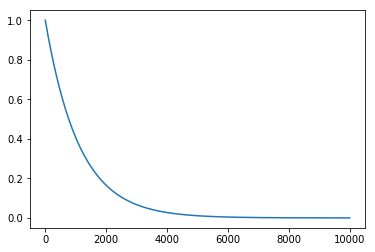

In [ ]:
plt.plot(time, epsilon)
plt.show()